In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [2]:
# 문제 1 : 데이터셋 불러오기 및 기본 정보 확인
# 1-1) Iris(붓꽃) 데이터셋을 불러오고, 데이터프레임으로 변환한 후 첫 5개 행을 출력하시오.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 1-2) 데이터프레임의 기본 정보를 확인하고, 각 열의 데이터 타입을 제시하시오.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# 1-3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스별 데이터 개수를 제시하시오.

species = df["species"].unique()
for i in species:
    print(f'품종{i}에 대한 데이터 개수(Shape) : {df[df["species"]==i].shape}')

품종setosa에 대한 데이터 개수(Shape) : (50, 5)
품종versicolor에 대한 데이터 개수(Shape) : (50, 5)
품종virginica에 대한 데이터 개수(Shape) : (50, 5)


In [8]:
# 문제 2: 데이터 시각화 및 탐색
# 2-1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)를 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오.
import matplotlib.pyplot as plt
species = df["species"].unique()
species_df=list()
for i in species:
    species_df.append(df[df["species"]==i])

Text(0, 0.5, 'sepal/petal width')

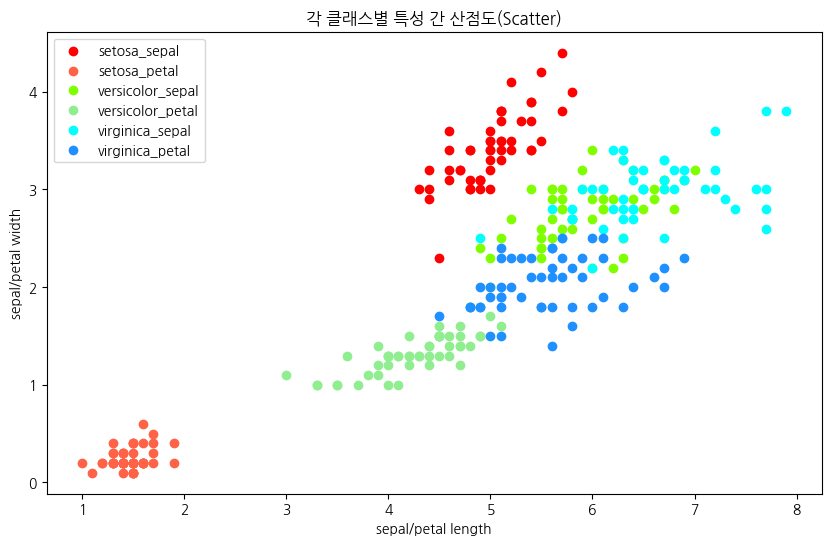

In [21]:
import koreanize_matplotlib

fig = plt.figure(figsize=(10, 6))
ax=fig.add_subplot(111)
ax.scatter(species_df[0]["sepal_length"],species_df[0]["sepal_width"],c='red',label='setosa_sepal')
ax.scatter(species_df[0]["petal_length"],species_df[0]["petal_width"],c='tomato',label='setosa_petal')
ax.scatter(species_df[1]["sepal_length"],species_df[1]["sepal_width"],c='chartreuse',label='versicolor_sepal')
ax.scatter(species_df[1]["petal_length"],species_df[1]["petal_width"],c='lightgreen',label='versicolor_petal')
ax.scatter(species_df[2]["sepal_length"],species_df[2]["sepal_width"],c='cyan',label='virginica_sepal')
ax.scatter(species_df[2]["petal_length"],species_df[2]["petal_width"],c='dodgerblue',label='virginica_petal')
ax.legend()
ax.set_title("각 클래스별 특성 간 산점도(Scatter)")
ax.set_xlabel("sepal/petal length")
ax.set_ylabel("sepal/petal width")

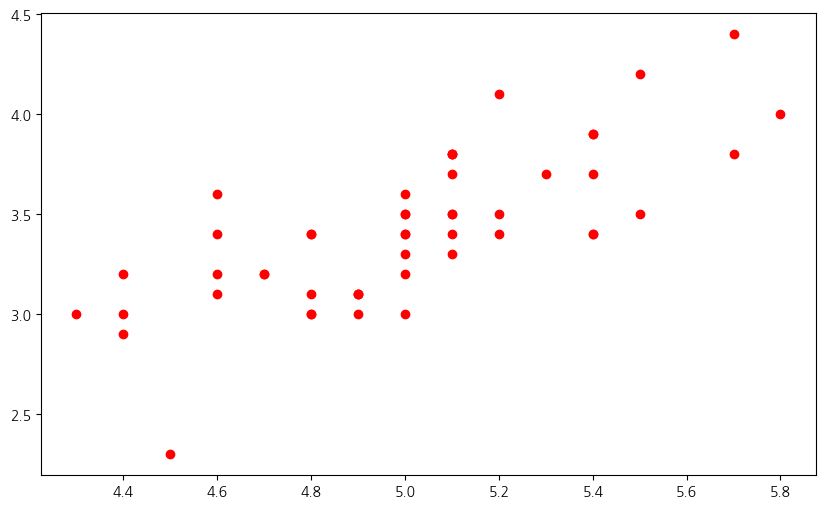

In [24]:
# 2-2) 꽃받침의 길이(Sepal Length)와 꽃받침의 너비(Sepal Width)의 관계를 시각화하고, 각 클래스별로 구분하여 출력하시오.
# 무슨말인지 모르겠다! 패스! 


fig = plt.figure(figsize=(10, 6))
ax=fig.add_subplot(111)
ax.scatter(species_df[0]["sepal_length"],species_df[0]["sepal_width"],c='red',label='setosa_sepal')


In [103]:
# 문제 3: 연속확률변수 및 연속확률분포 계산
# 3-1) 꽃잎의 길이(Petal Length)를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오.
petal=np.array(df["petal_length"])
mu=petal.mean()
sd=petal.std()
print(mu,sd)


3.758666666666666 1.7585291834055212


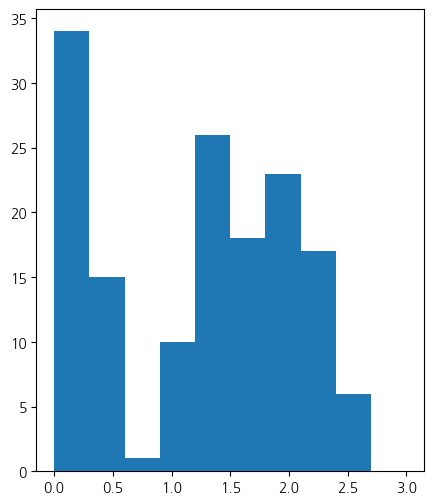

In [154]:
#3-2) 꽃잎의 너비(Petal Width)를 연속확률변수로 가정할 때, 이 확률변수의 확률밀도함수(probability density function, PDF)를 계산하고 그래프로 시각화하시오.
import math 

petal=np.array(df["petal_width"])
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(111)
y,x, z=ax.hist(petal,bins=10, range=(math.trunc(petal.min()), math.ceil(petal.max())) )


[0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ] [0.22666667 0.1        0.00666667 0.06666667 0.17333333 0.12
 0.15333333 0.11333333 0.04       0.        ]
[-0.06541178  0.54144244 -1.59845327  1.85159105 -0.37657544 -0.4935114
  0.22947552]


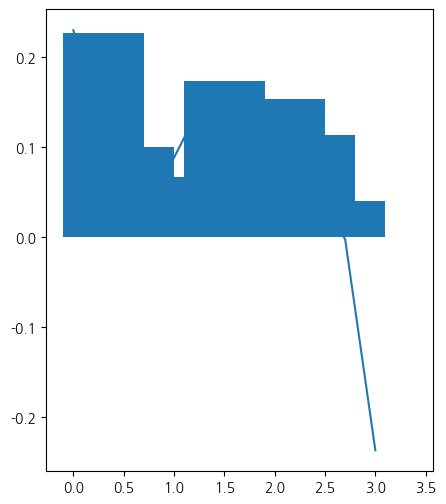

In [155]:
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(111)
print(x[1:],y/150)
ax.bar(x[1:],y/150)
poly_fit=np.polyfit(x[:-1],y/150,6)
print(poly_fit)
def line(x):
    return np.polyval(poly_fit, x)#/44.77
y2=line(x)
ax.plot(x,y2)

Text(0.5, 1.0, '확률밀도함수')

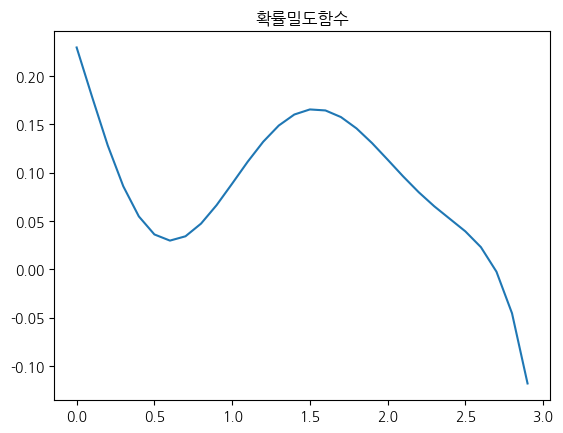

In [158]:
x=np.arange(0,3,0.1)
y=line(x)
plt.plot(x,y)
plt.title("확률밀도함수")

1 7


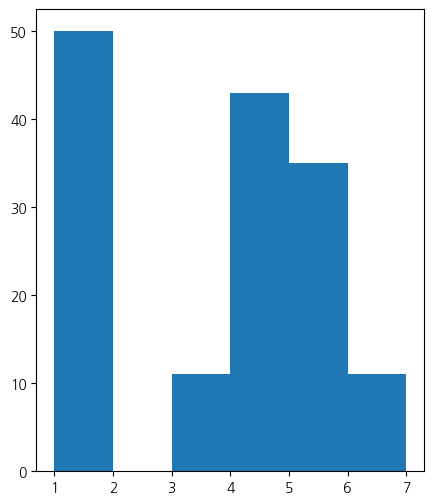

In [152]:
# 3-3) 꽃잎의 길이(Petal Length)가 4cm 이상 5cm 미만일 확률을 계산하시오.

import math 

petal=np.array(df["petal_length"])
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(111)
print(math.trunc(petal.min()), math.ceil(petal.max()))
y,x, z=ax.hist(petal,bins=6, range=(math.trunc(petal.min()), math.ceil(petal.max())) )

[2. 3. 4. 5. 6. 7.] [0.33333333 0.         0.07333333 0.28666667 0.23333333 0.07333333]
[1. 2. 3. 4. 5. 6. 7.]
[ 0.00888889 -0.15950617  0.96759259 -2.26972663  1.78888889]


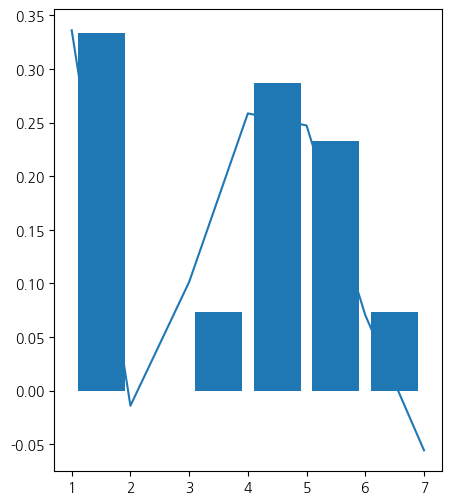

In [151]:
fig=plt.figure(figsize=(5,6))
ax=fig.add_subplot(111)
print(x[1:],y/150)
ax.bar(x[:-1]+0.5,y/150)
print(x)
poly_fit=np.polyfit(x[:-1],y/150,4)
print(poly_fit)
def line(x):
    return np.polyval(poly_fit, x)#/44.77
y2=line(x)
ax.plot(x,y2)

In [144]:
# 이산적으로 구함
print(f"꽃잎의 길이(Petal Legnth)가 4cm이상 5cm미만일 확률 : {y[3]/150}")

꽃잎의 길이(Petal Legnth)가 4cm이상 5cm미만일 확률 : 0.2866666666666667


In [153]:
# 연속적으로 구함
from scipy import integrate
print(f"꽃잎의 길이(Petal Legnth)가 4cm이상 5cm미만일 확률 : {integrate.quad(line, 4, 5)[0]}")

꽃잎의 길이(Petal Legnth)가 4cm이상 5cm미만일 확률 : 0.27016843033510984


In [ ]:
# 이산적으로 구한 확률 : 0.28, 연속적으로 구한 확률 : 0.27 => 비슷하다!